In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
discharge_data = np.random.uniform(size=100)

In [3]:
discharge_data

array([0.05167788, 0.9376025 , 0.66992288, 0.50682282, 0.56145708,
       0.08590146, 0.40671913, 0.94105495, 0.69360908, 0.45115226,
       0.68685338, 0.65755746, 0.68330315, 0.16270346, 0.68554592,
       0.29740197, 0.12027328, 0.27229228, 0.59960789, 0.84712264,
       0.15628795, 0.28111711, 0.6106904 , 0.31189052, 0.78351308,
       0.68255818, 0.51343623, 0.63088426, 0.18607581, 0.57659423,
       0.82548072, 0.93369737, 0.10159691, 0.7892242 , 0.92215707,
       0.35118291, 0.52529666, 0.67111934, 0.66234087, 0.92886542,
       0.2036005 , 0.15085207, 0.03803762, 0.97954202, 0.60377951,
       0.52424129, 0.63328897, 0.39339833, 0.15955829, 0.42567108,
       0.8519887 , 0.59888177, 0.54632011, 0.32983836, 0.74729833,
       0.82197246, 0.7827504 , 0.23398403, 0.93688715, 0.72304142,
       0.59557315, 0.21719987, 0.3797842 , 0.64396483, 0.35180964,
       0.93437729, 0.95895424, 0.59043331, 0.04458178, 0.87065608,
       0.08989336, 0.37722543, 0.64239459, 0.5093992 , 0.59300

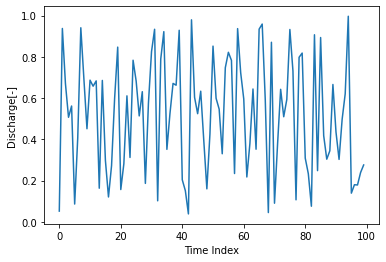

In [4]:
plt.plot(discharge_data)
plt.xlabel("Time Index")
plt.ylabel("Discharge[-]")
plt.show()

In [5]:
tmp = discharge_data
for i, val in enumerate(discharge_data):
    if val < 0.2:
        tmp[i] = 0.2
    if val > 0.9:
        tmp[i] = 0.9
discharge_data = tmp

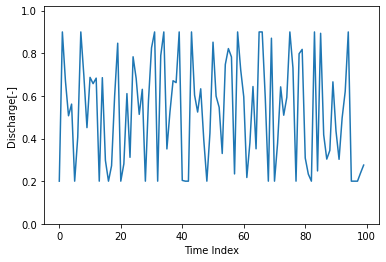

In [6]:
plt.plot(discharge_data)
plt.xlabel("Time Index")
plt.ylabel("Discharge[-]")
plt.ylim(0,1.02)
plt.show()

In [7]:
padding = np.random.randint(low=1, high=10, size=100)
padding

array([7, 5, 5, 7, 8, 4, 2, 3, 1, 1, 6, 4, 3, 8, 2, 2, 1, 8, 9, 9, 7, 5,
       3, 7, 8, 7, 2, 7, 3, 1, 5, 6, 7, 4, 9, 3, 2, 1, 3, 5, 7, 3, 8, 2,
       6, 3, 6, 7, 2, 7, 4, 4, 4, 4, 8, 8, 7, 1, 3, 1, 9, 3, 3, 3, 9, 5,
       2, 3, 7, 4, 8, 3, 1, 9, 9, 5, 1, 6, 4, 3, 8, 2, 8, 6, 6, 8, 3, 3,
       6, 9, 8, 1, 8, 1, 6, 4, 5, 2, 8, 3])

In [8]:
padded = np.pad(padding, (10,10), mode='reflect')

In [9]:
padded

array([6, 1, 1, 3, 2, 4, 8, 7, 5, 5, 7, 5, 5, 7, 8, 4, 2, 3, 1, 1, 6, 4,
       3, 8, 2, 2, 1, 8, 9, 9, 7, 5, 3, 7, 8, 7, 2, 7, 3, 1, 5, 6, 7, 4,
       9, 3, 2, 1, 3, 5, 7, 3, 8, 2, 6, 3, 6, 7, 2, 7, 4, 4, 4, 4, 8, 8,
       7, 1, 3, 1, 9, 3, 3, 3, 9, 5, 2, 3, 7, 4, 8, 3, 1, 9, 9, 5, 1, 6,
       4, 3, 8, 2, 8, 6, 6, 8, 3, 3, 6, 9, 8, 1, 8, 1, 6, 4, 5, 2, 8, 3,
       8, 2, 5, 4, 6, 1, 8, 1, 8, 9])

In [10]:
padding[:11] == padded[:11][::-1] # Padding works as expected

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [104]:
# Figure out what needs to be dataframes and does not need to be dataframes.
def BFI(Q, alpha=0.925, passes=3, ReturnQbase=False, reflect=30):
    #Q = pd.DataFrame(Q, columns=["dis"]) # Adding input to DF
    # Above is not needed in actual program
    def first_pass(Q, a):
        b = 0.5 * (1+a)
        Qf1 = np.zeros(len(Q)) # Empty quickflow 
        Qf1[0] = Q[0]
        for i in range(1, len(Qf1)):
            Qf1[i] = a*Qf1[i-1] + b*(Q[i]-Q[i-1])
            
        Qb1 = np.where(Qf1 > 0, Q-Qf1, Q)
        
        return pd.DataFrame({"Qf": Qf1, "Qb": Qb1})
    
    def backwards_pass(Q, a):
        n = len(Q["Qb"])
        Qb = Q["Qb"]
        b = 0.5 * (1+a)
        
        Qf2 = np.zeros(n) # Empty array
        Qf2[-1] = Qb.iloc[-1]
        
        for i in range(n-2, 0, -1):
            Qf2[i] = a*Qf2[i+1] + b*(Qb.iloc[i] - Qb.iloc[i+1])
            
        Qb2 = np.where(Qf2 > 0, Qb - Qf2, Qb)
        
        return pd.DataFrame({"Qf": Qf2, "Qb": Qb2})
    
    def forward_pass(Q, a):
        n = len(Q["Qb"])
        Qb = Q["Qb"]
        b = 0.5 * (1+a)
        
        Qf2 = np.zeros(n) # Empty array
        Qf2[0] = Qb.iloc[0]
        
        for i in range(1, n):
            Qf2[i] = a*Qf2[i-1] + b*(Qb.iloc[i] - Qb.iloc[i-1])
            
        Qb2 = np.where(Qf2 > 0, Qb - Qf2, Qb)
        
        return pd.DataFrame({"Qf": Qf2, "Qb": Qb2})
    
    
    Qin = np.pad(Q, (reflect, reflect), mode="reflect")
        
        
    df1 = first_pass(Qin, alpha)
    df2 = backwards_pass(df1, alpha)
    df3 = forward_pass(df2, alpha)
    return Q, df1, df2, df3, Qin


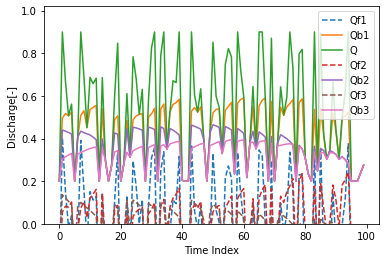

In [105]:
Q, df1, df2, df3, Qin = BFI(discharge_data)
# Below should be done inside the function. 
reflect = 30
Qf1 = df1["Qf"].iloc[reflect:-reflect].to_numpy()
Qb1 = df1["Qb"].iloc[reflect:-reflect].to_numpy()
Qf2 = df2["Qf"].iloc[reflect:-reflect].to_numpy()
Qb2 = df2["Qb"].iloc[reflect:-reflect].to_numpy()
Qf3 = df3["Qf"].iloc[reflect:-reflect].to_numpy()
Qb3 = df3["Qb"].iloc[reflect:-reflect].to_numpy()

plt.plot(Qf1, label="Qf1", linestyle="--")
plt.plot(Qb1, label="Qb1")
plt.plot(Q, label="Q")
plt.plot(Qf2, label="Qf2", linestyle="--")
plt.plot(Qb2, label="Qb2")
plt.plot(Qf3, label="Qf3", linestyle="--")
plt.plot(Qb3, label="Qb3")

plt.legend()
plt.xlabel("Time Index")
plt.ylabel("Discharge[-]")
plt.ylim(0,1.02)
plt.show()


In [120]:
df_tmp_tmp = df1.iloc[reflect:-reflect]
df11 = df_tmp_tmp["Qf"]
df22 = df_tmp_tmp["Qb"]
df22.to_numpy()

array([0.2       , 0.49551494, 0.51722343, 0.50682282, 0.52342816,
       0.2       , 0.40671913, 0.50874845, 0.53035266, 0.45115226,
       0.53616711, 0.54636999, 0.55567451, 0.2       , 0.53929655,
       0.29740197, 0.2       , 0.27229228, 0.48902774, 0.50660306,
       0.2       , 0.28111711, 0.48468202, 0.31189052, 0.48778571,
       0.50617946, 0.51306579, 0.51749787, 0.2       , 0.5007277 ,
       0.51575093, 0.54177514, 0.2       , 0.53880851, 0.56174378,
       0.35118291, 0.52529666, 0.56000773, 0.56801191, 0.5839988 ,
       0.2036005 , 0.2       , 0.2       , 0.5283713 , 0.54513519,
       0.52424129, 0.5489669 , 0.39339833, 0.2       , 0.42567108,
       0.52102196, 0.53635295, 0.53907155, 0.32983836, 0.53202747,
       0.55097306, 0.56982719, 0.23398403, 0.56535077, 0.58381351,
       0.58947555, 0.21719987, 0.3797842 , 0.55171932, 0.35180964,
       0.55354863, 0.57953248, 0.59043331, 0.2       , 0.5740625 ,
       0.2       , 0.37722543, 0.54695483, 0.5093992 , 0.54928

In [13]:
import numpy as np 
import pandas as pd 
import os 
from typing import Dict, List, Tuple
import shutil

In [14]:
def _get_list_of_files(folder_path) -> Tuple[List, List]:
    folder: os.DirEntry = os.scandir(folder_path)          # Reads the directory
    for file in folder:                                         # Loop over files
        if file.name[-len(filetype):] == filetype:    # Checks for files of filetype
            folder_list_data.append(file.name)             # Adds filenames with correct filetype to list
        else:
            folder_list_supplementary.append(file.name)    # Add all other files to a supplementary list
    folder.close()                                              # Close the folder to prevent mishaps
    return (folder_list_data, folder_list_supplementary)

In [15]:
def sample_data(sample):
    def _read_file_unparsed(path) -> pd.DataFrame:
        df_input = pd.read_csv(path, delim_whitespace=True, parse_dates=[0], names=["date", "discharge"]) # Creates a dataframe with space as delim
        return df_input
    def _slice_dataframe(df_input) -> pd.DataFrame:
        df_input["day"] = df_input["date"].dt.day
        df_input["month"] = df_input["date"].dt.month
        df_input["year"] = df_input["date"].dt.year
        indexes = list(zip(df_input["year"], df_input["month"], df_input["day"]))
        index = pd.MultiIndex.from_tuples(indexes, names=["year", "month", "day"])
        df_output: pd.DataFrame = pd.DataFrame(df_input["discharge"], copy=True)
        df_output.set_index(index, inplace=True)

        hyearstart = (df_output.iloc[0].name[0], 9, 1)             # Start of the hydrological year in Norway
        hyearend = (df_output.iloc[-1].name[0], 8, 31)             # End of the hydrological year in Norway
        df_output = df_output.loc[hyearstart:hyearend]        # Slice the df to fit within the hydrological years
        
        # This trims the head and tail of data sets to make them span a hydrological year, without having nan-values at start and end
        
        parse = True
        while parse: 
            start = df_output.iloc[0].name[0]
            slutt = df_output.iloc[-1].name[0]
            slice_head = df_output.loc[(start, 9, 1)].values == -9999
            slice_tail = df_output.loc[(slutt, 8, 31)].values == -9999
            
            if slice_head:
                hyearstart = (start + 1, 9, 1)
            if slice_tail:
                hyearend = (slutt - 1, 8, 31) 
            df_output = df_output.loc[hyearstart:hyearend]
            end_loop = df_output.loc[(start + 1, 9, 1)].values != -9999
            if end_loop:
                parse = False
            
        return df_output
    df = _read_file_unparsed(sample)
    df = _slice_dataframe(df)
    return df

In [16]:
folder_path = "./data/"
data_folder = "discharge_data_100/"
filetype = ".q"
folder_list_data = []
folder_list_supplementary = []

data, supp = _get_list_of_files(folder_path + data_folder)
sample_df = sample_data(folder_path + data_folder + data[10]) # A single dataframe used as a sample to save time

In [17]:
sample_df

discharge
year month day           
1965 9     1     6.675474
           2     5.677709
           3     6.164865
           4    11.282411
           5    10.248291
...                   ...
2020 8     27    9.599516
           28    7.642525
           29    6.589672
           30    6.248318
           31    5.388065

[20089 rows x 1 columns]

In [18]:
def nan_index(Q, reflect=30):
    data = Q["discharge"].to_numpy()
    l = []
    i = 0
    vq = 0
    while i < len(data):
        val = data[i]
        if val == -9999:
            v1 = i
            for j, val in enumerate(data[i:]):
                if val != -9999:
                    v2 = i + j
                    break
            l.append((v1,v2, v2-v1, v1-vq))
            vq = v2

            i += j
        i += 1
    return l 

In [19]:
l = nan_index(sample_df)

In [100]:
l    
for q in l:
    foo = str(q)
    
eval(foo)

(6315, 6316, 1, 6315)

In [21]:
for i,j,z,x in l:
#     print("DataFrame: ",sample_df["discharge"].iloc[i:j])
#     print()
    print("Series of missing values:")
    print("Start index: ", i)
    print("Final index: ", j)
    print("Missing value length: ",z)
    print("Dataframe length: ", len(sample_df["discharge"].iloc[i:j]))
    print("Non-missing before: ", x)
    print()
    

Series of missing values:
Start index:  6315
Final index:  6316
Missing value length:  1
Dataframe length:  1
Non-missing before:  6315



In [24]:
df_test = pd.DataFrame(columns=["!", "%", "¤"])
df_test

,!,%,¤


In [95]:
A = {"!":45,"%":"Oslo","¤":"UTM32"}
df_test = df_test.append(A, ignore_index=True)
df_test

,!,%,¤
0,45,Oslo,UTM32
1,45,Oslo,UTM32
2,45,Oslo,UTM32
3,45,Oslo,UTM32
4,45,Oslo,UTM32
5,45,Oslo,UTM32
6,45,Oslo,UTM32
7,45,Oslo,UTM32
8,45,Oslo,UTM32
9,45,Oslo,UTM32
